In [12]:
import os
import pandas as pd

In [2]:
NUM_EXP = '4'

In [34]:
def read_log_file(path, filename):
    with open(os.path.join(path, filename), 'r') as f:
        data = f.read()
        data = data.rstrip().split('\n')
        data = list(map(lambda x: x.rstrip().split('\t'), data))[1:]
        train_RMSE = list(map(lambda x: float(x[0]), data))
        train_R2 = list(map(lambda x: float(x[2]), data))
        val_RMSE = list(map(lambda x: float(x[1]), data))
        val_R2 = list(map(lambda x: float(x[3]), data))
        return train_RMSE, train_R2, val_RMSE, val_R2

In [87]:
def plot_training_process(num_exp = '', \
                          logs_path = '../logs/exp_'+str(NUM_EXP), \
                          logs_filename_prefix =  str(NUM_EXP)+'_logs_metrics', \
                          logs_test_fin_file = str(NUM_EXP)+'_logs.txt', \
                          parameters_file = str(NUM_EXP)+'_parameters.json'):
    import matplotlib.pyplot as plt
    import json
    train_RMSE_conv, train_R2_conv, val_RMSE_conv, val_R2_conv = \
    read_log_file(logs_path, logs_filename_prefix+'_conv.txt')  
    train_RMSE_morgan, train_R2_morgan, val_RMSE_morgan, val_R2_morgan = \
    read_log_file(logs_path, logs_filename_prefix+'_morgan.txt') 
    fig, ax = plt.subplots(2,2, figsize = (10,10), sharey='row', sharex='col')

    ax[0,0].plot(train_RMSE_conv, label='train')
    ax[0,0].plot(val_RMSE_conv, label = 'val')
    ax[0,0].set_ylabel('RMSE')
    ax[0,0].set_title('Neural Fingerprints')


    ax[1,0].plot(train_R2_conv, label='train')
    ax[1,0].plot(val_R2_conv, label = 'val')
    ax[1,0].set_xlabel('Iterations/10')
    ax[1,0].set_ylabel('R2')
    ax[1,0].set_ylim(-0.5,1)


    ax[0,1].plot(train_RMSE_morgan, label='train')
    ax[0,1].plot(val_RMSE_morgan, label = 'val')
    ax[0,1].set_title('Morgan Fingerprints')

    ax[1,1].plot(train_R2_morgan, label='train')
    ax[1,1].plot(val_R2_morgan, label = 'val')
    ax[1,1].set_xlabel('Iterations/10')


    for i in range(2):
        for j in range(2):
            ax[i,j].legend()

    with open(os.path.join(logs_path, logs_test_fin_file)) as f:
        test_R2 = float(f.read().rstrip().split('\n')[-1].split(' ')[-1])
        
    with open(os.path.join(logs_path, parameters_file)) as f:
        params = json.load(f)
        dataset_name = params['data_file']
        
    fig.suptitle('Experiment ' + str(num_exp) + \
                 '. test R2 score = ' + str(round(test_R2, 2))+\
                '\n'+'Dataset: '+dataset_name)
    
    plt.show()
    
    return fig, ax

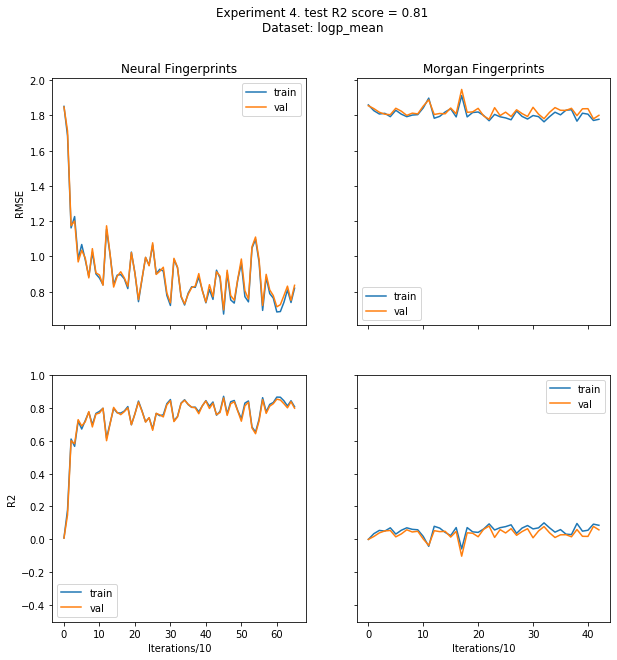

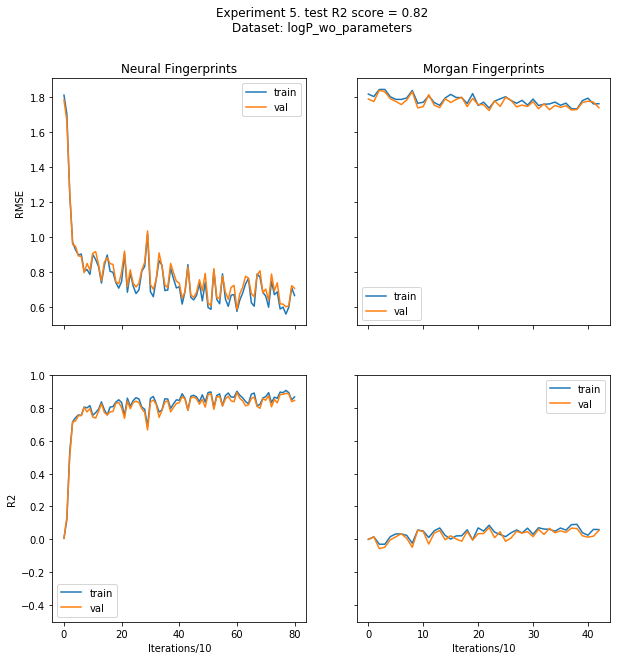

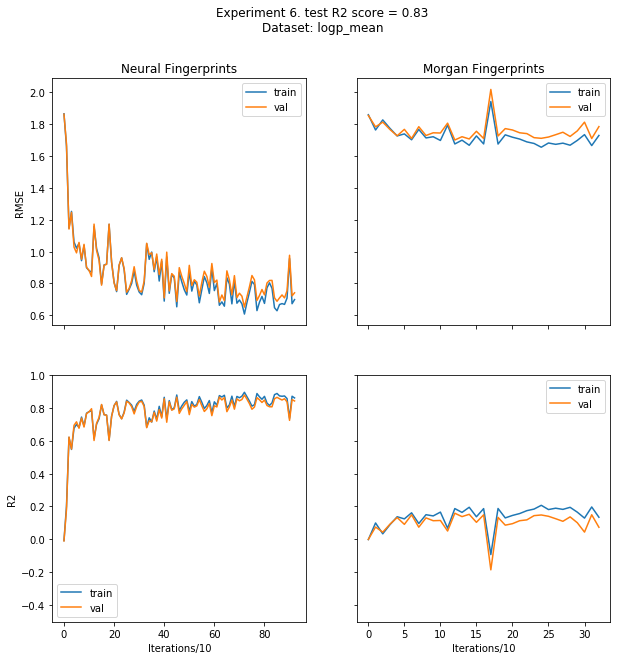

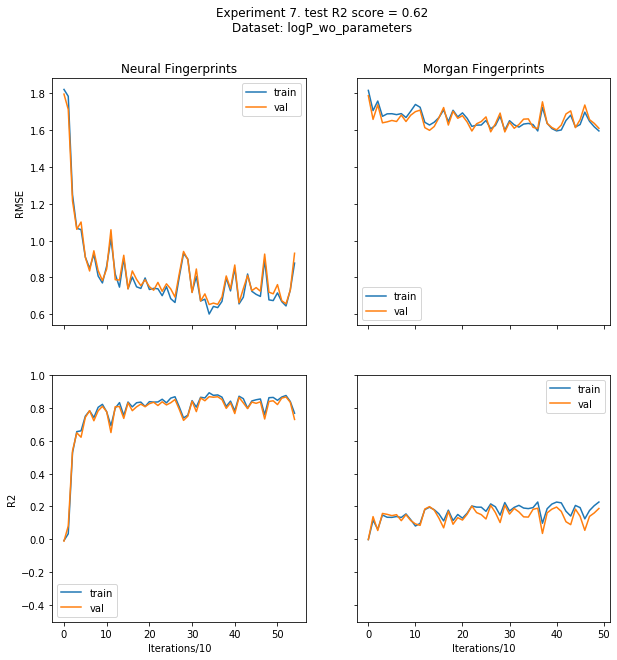

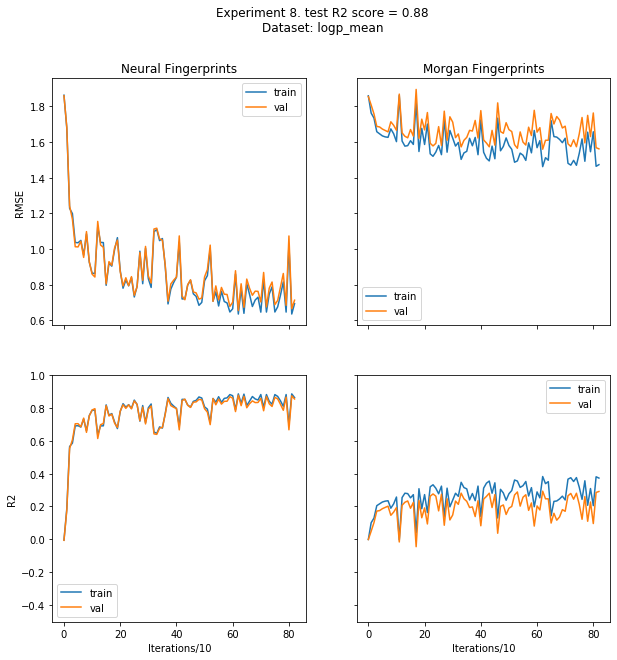

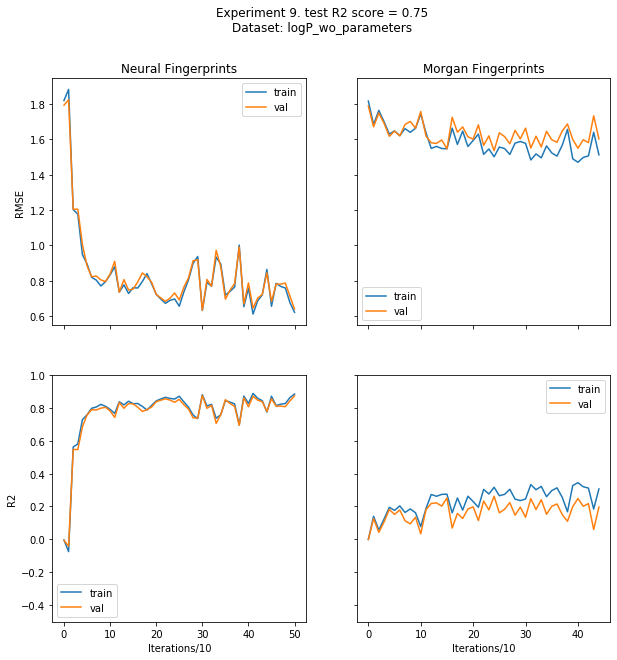

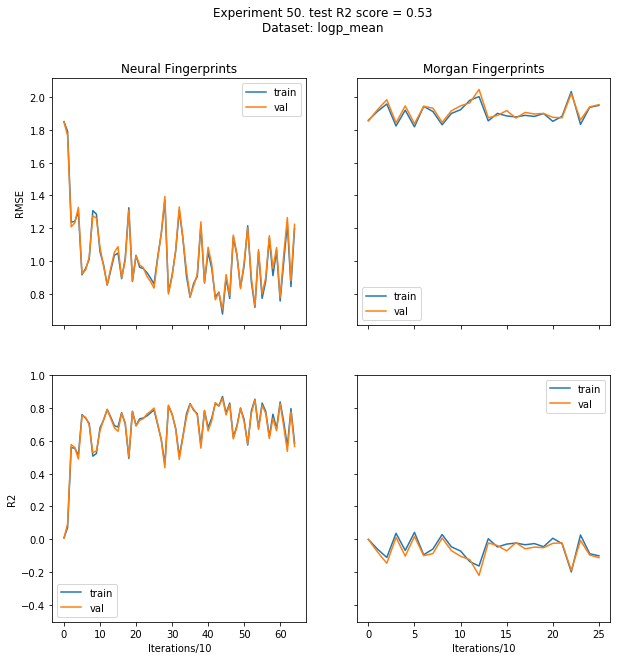

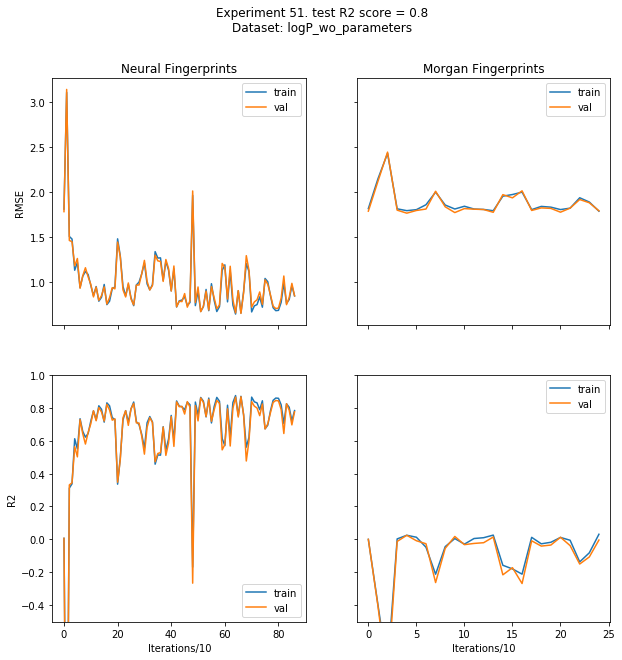

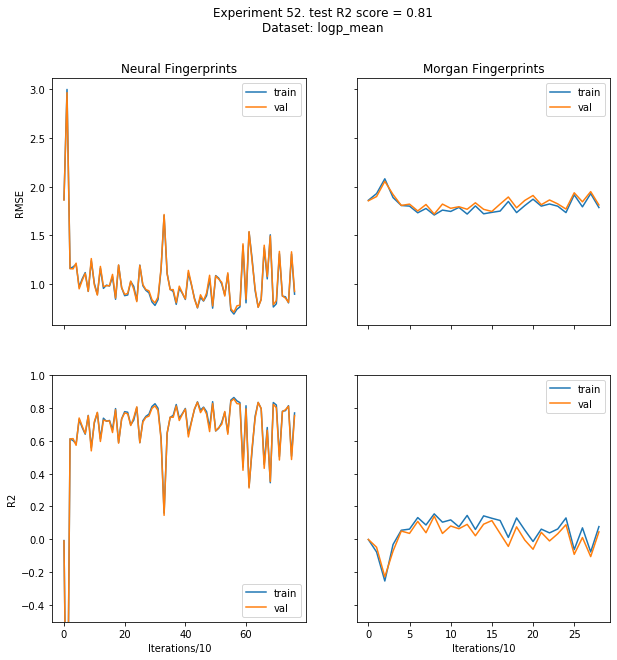

In [89]:
for NUM_EXP in list(range(4,10))+list(range(50,53)):
    _ = plot_training_process(num_exp = NUM_EXP, \
                              logs_path = '../logs/exp_'+str(NUM_EXP), \
                              logs_filename_prefix =  str(NUM_EXP)+'_logs_metrics', \
                              logs_test_fin_file = str(NUM_EXP)+'_logs.txt', \
                              parameters_file = str(NUM_EXP)+'_parameters.json')

In [108]:
def summary_table(num_exp = range(4,8), logs_path = '../logs',logs_postfix = '_logs.txt',):
    import pandas as pd
    import os
    import json
    
    
    
    summary = []
    
    for NUM_EXP in num_exp:
        with open(os.path.join(logs_path, 'exp_'+str(NUM_EXP), str(NUM_EXP)+'_parameters.json')) as f:
            summary.append(json.load(f))
        with open(os.path.join(logs_path, 'exp_'+str(NUM_EXP), str(NUM_EXP)+logs_postfix)) as f:
            data = f.read().rstrip().split('\n')
            conv_test_R2 = float(data[-1].split(' ')[-1])
            avg_test_R2 = float(data[-2].split(' ')[-1])
            morgan_test_R2 = float(data[-3].split(' ')[-1])
            summary[-1]['Neural Fingerprint test R2'] = conv_test_R2
            summary[-1]['Average test R2'] = avg_test_R2
            summary[-1]['Morgan Fingerprint test R2'] = morgan_test_R2
        train_RMSE_conv, train_R2_conv, val_RMSE_conv, val_R2_conv = \
        read_log_file(logs_path+'/exp_'+str(NUM_EXP), str(NUM_EXP)+'_logs_metrics'+'_conv.txt')  
        train_RMSE_morgan, train_R2_morgan, val_RMSE_morgan, val_R2_morgan = \
        read_log_file(logs_path+'/exp_'+str(NUM_EXP), str(NUM_EXP)+'_logs_metrics'+'_morgan.txt') 
        summary[-1]['Neural Fingerprint train RMSE'] = train_RMSE_conv[-1]
        summary[-1]['Neural Fingerprint val RMSE'] = val_RMSE_conv[-1]
        summary[-1]['Neural Fingerprint train R2'] = train_R2_conv[-1]
        summary[-1]['Neural Fingerprint val R2'] = val_R2_conv[-1]
        
        summary[-1]['Morgan Fingerprint train RMSE'] = train_RMSE_morgan[-1]
        summary[-1]['Morgan Fingerprint val RMSE'] = val_RMSE_morgan[-1]
        summary[-1]['Morgan Fingerprint train R2'] = train_R2_morgan[-1]
        summary[-1]['Morgan Fingerprint val R2'] = val_R2_morgan[-1]
        
        summary[-1]['num_iters'] = len(train_R2_conv)*10

    return pd.DataFrame(summary)
        

In [109]:
experiment_info_table = summary_table(num_exp = list(range(4,10))+list(range(50,53))).sort_values(by='Neural Fingerprint test R2', ascending=False)

In [119]:
set(list(experiment_info_table)) - set(list(experiment_info_table_changed_parameters))

{'NUM_EXP',
 'conv_width',
 'fp_depth',
 'h1_size',
 'init_scale',
 'l1_penalty',
 'l2_penalty',
 'num_epochs'}

In [110]:
experiment_info_table.head()

,num_epochs,learn_rate,fp_depth,conv_width,fp_length,init_scale,h1_size,data_file,NUM_EXP,l2_penalty,...,Morgan Fingerprint test R2,Neural Fingerprint train RMSE,Neural Fingerprint val RMSE,Neural Fingerprint train R2,Neural Fingerprint val R2,Morgan Fingerprint train RMSE,Morgan Fingerprint val RMSE,Morgan Fingerprint train R2,Morgan Fingerprint val R2,num_iters
4,10,-3.0,3,10,40,-4,100,logp_mean,8,-4.0,...,0.269007,0.692662,0.711862,0.861188,0.852686,1.472776,1.561542,0.372437,0.291142,830
2,10,-3.0,3,10,30,-4,100,logp_mean,6,-4.0,...,0.168087,0.697841,0.740510,0.859105,0.840591,1.729379,1.784988,0.134704,0.073763,930
1,10,-3.0,3,10,20,-4,100,logP_wo_parameters,5,-4.0,...,0.027882,0.665528,0.706690,0.865486,0.843479,1.759459,1.736593,0.059856,0.054826,810
8,10,-2.0,3,10,30,-4,100,logp_mean,52,-4.0,...,-0.029962,0.895696,0.923595,0.767884,0.752021,1.785201,1.811621,0.077941,0.045917,770
0,10,-3.0,3,10,20,-4,100,logp_mean,4,-4.0,...,0.069325,0.819663,0.836296,0.805618,0.796684,1.777490,1.799968,0.085889,0.058151,660


In [116]:
experiment_info_table = summary_table(num_exp = list(range(4,10))+list(range(50,53))).sort_values(by='Neural Fingerprint test R2', ascending=False)
scores = list(filter(lambda x: 'Fingerprint' in x, list(experiment_info_table)))
for score in scores:
    experiment_info_table[score] = \
    experiment_info_table[score].apply(lambda x: round(x, 2))
nunique = experiment_info_table.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
experiment_info_table_changed_parameters = experiment_info_table.drop(cols_to_drop, axis=1)
experiment_info_table_changed_parameters = experiment_info_table_changed_parameters.set_index('NUM_EXP')
experiment_info_table_changed_parameters = experiment_info_table_changed_parameters[['learn_rate',
 'fp_length',
 'data_file',
 'num_iters', 
 'Neural Fingerprint test R2',
 'Average test R2',
 'Morgan Fingerprint test R2',
 'Neural Fingerprint train RMSE',
 'Neural Fingerprint val RMSE',
 'Neural Fingerprint train R2',
 'Neural Fingerprint val R2',
 'Morgan Fingerprint train RMSE',
 'Morgan Fingerprint val RMSE',
 'Morgan Fingerprint train R2',
 'Morgan Fingerprint val R2']]

In [117]:
experiment_info_table_changed_parameters

,learn_rate,fp_length,data_file,num_iters,Neural Fingerprint test R2,Average test R2,Morgan Fingerprint test R2,Neural Fingerprint train RMSE,Neural Fingerprint val RMSE,Neural Fingerprint train R2,Neural Fingerprint val R2,Morgan Fingerprint train RMSE,Morgan Fingerprint val RMSE,Morgan Fingerprint train R2,Morgan Fingerprint val R2
NUM_EXP,,,,,,,,,,,,,,,
8,-3.0,40,logp_mean,830,0.88,-0.000018,0.27,0.69,0.71,0.86,0.85,1.47,1.56,0.37,0.29
6,-3.0,30,logp_mean,930,0.83,-0.000018,0.17,0.70,0.74,0.86,0.84,1.73,1.78,0.13,0.07
5,-3.0,20,logP_wo_parameters,810,0.82,-0.000299,0.03,0.67,0.71,0.87,0.84,1.76,1.74,0.06,0.05
52,-2.0,30,logp_mean,770,0.81,-0.000018,-0.03,0.90,0.92,0.77,0.75,1.79,1.81,0.08,0.05
4,-3.0,20,logp_mean,660,0.81,-0.000018,0.07,0.82,0.84,0.81,0.80,1.78,1.80,0.09,0.06
51,-2.0,20,logP_wo_parameters,870,0.80,-0.000299,-0.35,0.85,0.85,0.78,0.77,1.79,1.79,0.03,-0.00
9,-3.0,40,logP_wo_parameters,510,0.75,-0.000299,0.27,0.62,0.64,0.88,0.87,1.51,1.60,0.31,0.20
7,-3.0,30,logP_wo_parameters,550,0.62,-0.000299,0.17,0.88,0.93,0.77,0.73,1.60,1.61,0.23,0.19
50,-2.0,20,logp_mean,650,0.53,-0.000018,-0.12,1.20,1.22,0.58,0.56,1.95,1.95,-0.10,-0.11


In [118]:
with open('../raw/experiments_result','w') as f:
    f.write(experiment_info_table_changed_parameters.to_markdown())

In [123]:
experiment_info_table_sum = experiment_info_table_changed_parameters[[
 'data_file',
 'Neural Fingerprint test R2',
 'Average test R2',
 'Morgan Fingerprint test R2',
 'Neural Fingerprint val RMSE',
 'Neural Fingerprint val R2',
 'Neural Fingerprint train RMSE',
 'Neural Fingerprint train R2',
 'Morgan Fingerprint val RMSE',
 'Morgan Fingerprint val R2',
 'Morgan Fingerprint train RMSE',
 'Morgan Fingerprint train R2',
]]

In [124]:
experiment_info_table_sum

,data_file,Neural Fingerprint test R2,Average test R2,Morgan Fingerprint test R2,Neural Fingerprint val RMSE,Neural Fingerprint val R2,Neural Fingerprint train RMSE,Neural Fingerprint train R2,Morgan Fingerprint val RMSE,Morgan Fingerprint val R2,Morgan Fingerprint train RMSE,Morgan Fingerprint train R2
NUM_EXP,,,,,,,,,,,,
8,logp_mean,0.88,-0.000018,0.27,0.71,0.85,0.69,0.86,1.56,0.29,1.47,0.37
6,logp_mean,0.83,-0.000018,0.17,0.74,0.84,0.70,0.86,1.78,0.07,1.73,0.13
5,logP_wo_parameters,0.82,-0.000299,0.03,0.71,0.84,0.67,0.87,1.74,0.05,1.76,0.06
52,logp_mean,0.81,-0.000018,-0.03,0.92,0.75,0.90,0.77,1.81,0.05,1.79,0.08
4,logp_mean,0.81,-0.000018,0.07,0.84,0.80,0.82,0.81,1.80,0.06,1.78,0.09
51,logP_wo_parameters,0.80,-0.000299,-0.35,0.85,0.77,0.85,0.78,1.79,-0.00,1.79,0.03
9,logP_wo_parameters,0.75,-0.000299,0.27,0.64,0.87,0.62,0.88,1.60,0.20,1.51,0.31
7,logP_wo_parameters,0.62,-0.000299,0.17,0.93,0.73,0.88,0.77,1.61,0.19,1.60,0.23
50,logp_mean,0.53,-0.000018,-0.12,1.22,0.56,1.20,0.58,1.95,-0.11,1.95,-0.10


In [125]:
with open('../raw/experiments_result','w') as f:
    f.write(experiment_info_table_sum.to_markdown())